In [10]:
from common.modelLoader import ModelLoader
from common.modelAnalyzer import ModelAnalyzer
from configs.testDataConfig import TestDataConfig
from common.predict import Predict
import pandas as pd

'''
 ML stats
'''

In [ ]:
longTargetKey = "longEntry50"
shortTargetKey = "shortEntry50"
longRnn, longHistory = ModelLoader.loadModel(longTargetKey)
shortRnn, shortHistory = ModelLoader.loadModel(shortTargetKey)
longAnalyzer = ModelAnalyzer(longHistory)
shortAnalyzer = ModelAnalyzer(shortHistory)

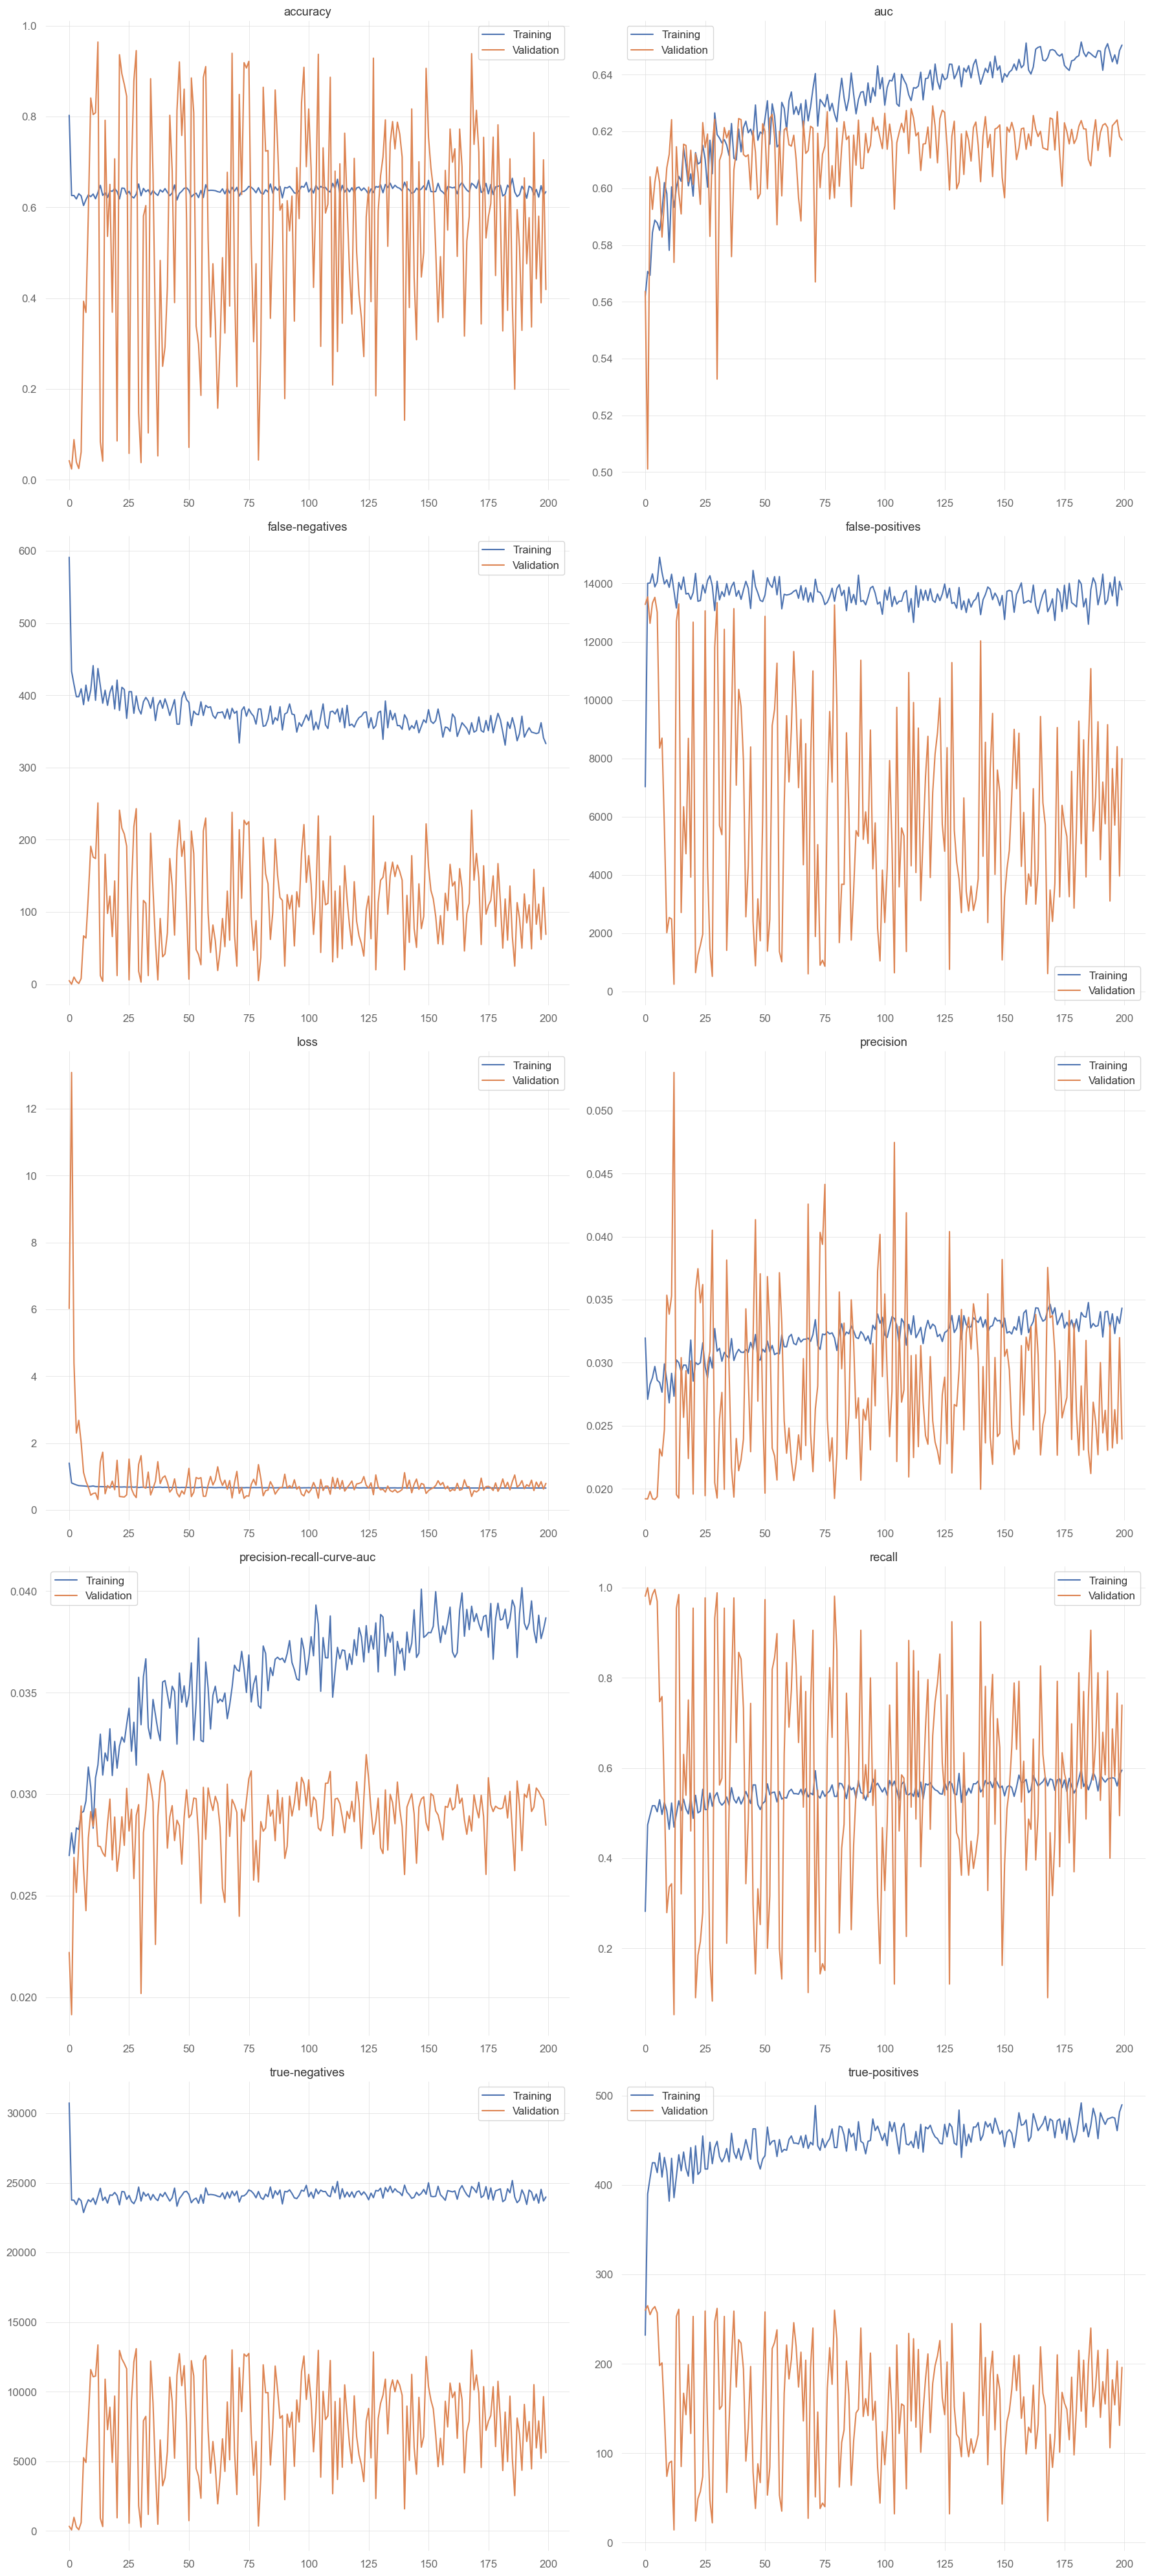

In [28]:
longAnalyzer.makeFigs()

In [ ]:
(testLaggedReturns, testFeatures, testTargets)=TestDataConfig.btcSplitConfig()
predictor = Predict("longEntry50", "shortEntry50",
                    testLaggedReturns, testFeatures, testTargets)
predictor.runPredicts()

In [30]:
test_predict = pd.Series(predictor.test_predict_long, index=testTargets.index)
y_test = predictor.y_test_longs
print(test_predict.shape)
print(y_test.shape)

(13872,)
(13872,)


In [31]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_score=test_predict, y_true=y_test)


0.6169131870249913

In [32]:
((test_predict>.5) == y_test).astype(int).mean()

0.418901384083045

In [33]:
from scipy.stats import spearmanr

spearmanr(test_predict, y_test)[0]

0.055439483154020655